# 다나와 무선청소기 검색 후 크롤링

In [1]:
import numpy as np
import pandas as pd
import folium, json

import warnings
warnings.filterwarnings('ignore')

import requests
from bs4 import BeautifulSoup
from urllib.parse import quote
from tqdm.notebook import tqdm

import re
import time

import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [4]:
driver = webdriver.Chrome()
url = "https://www.danawa.com/"
driver.get(url)
time.sleep(2)

In [5]:
driver.find_element(By.CSS_SELECTOR, ".search__input").send_keys("무선청소기")
driver.find_element(By.CSS_SELECTOR, ".search__submit").click()

In [6]:
soup = BeautifulSoup(driver.page_source, "html.parser")
soup

<html class="js no-touch" lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml"><head>
<title>무선청소기 : 다나와 통합검색</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="무선청소기 통합검색 : 다나와 통합검색" name="title"/>
<meta content="'무선청소기'의 다나와 통합검색 결과입니다." name="description"/>
<meta content="무선청소기, 다나와, 최저가, 가격비교, 검색, 통합검색, 차이슨 무선청소기, 샤오미 무선청소기, 일렉트로룩스 무선청소기, 디베아 무선청소기, 삼성 무선청소기, 아이닉 무선청소기 new i20, lg 무선청소기, 다이슨 무선청소기, 무선청소기 캐치웰 cx pro, 차량용 무선청소기" name="keywords"/>
<meta content="무선청소기 통합검색 : 다나와 통합검색" property="og:title"/>
<meta content="'무선청소기'의 다나와 통합검색 결과입니다." property="og:description"/>
<meta content="https://img.danawa.com/new/tour/img/logo/sns_danawa.jpg" property="og:image"/>
<meta content="width=1280" name="viewport"/>
<link href="//img.danawa.com/new/danawa_main/v1/img/danawa_favicon.ico" rel="shortcut icon"/>
<link href="//static.danawa.com/css/common.css?v=2304171200" rel="stylesheet" type=

In [55]:
li = soup.select(".product_list>li")[0]

In [58]:
li.select_one(".prod_name").text.strip()

'베이스어스 차량용 청소기 A3 (해외구매)'

In [34]:
li.select_one(".spec_list").text.strip().replace("\t","").replace("\n","")

'핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이드바닥 / 스팀물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [배터리] 분리형 (2개) / 충전시간: 4시간 / 사용시간: 1시간 / [성능] 스마트인버터모터 / 헤파필터 / 5단계여과 / [기능] IoT기능 / 디스플레이표시창 / 자동물공급 / LED라이트 / 자동먼지비움 / [부가] 색상: 카밍베이지 / 무게: 2.7kg / 크기(가로x세로x깊이): 300x1120x260mm'

In [37]:
int(li.select_one(".click_log_product_standard_price_").text.strip().replace(",","").replace("원",""))

1036780

In [53]:
soup.select(".paging_number_wrap a")
# data-page

[<a class="snum now_spage click_log_page" data-page="1" href="#" onclick="getPage(1); return false;">1</a>,
 <a class="snum click_log_page" data-page="2" href="#" onclick="getPage(2); return false;">2</a>,
 <a class="snum click_log_page" data-page="3" href="#" onclick="getPage(3); return false;">3</a>,
 <a class="snum click_log_page" data-page="4" href="#" onclick="getPage(4); return false;">4</a>,
 <a class="snum click_log_page" data-page="5" href="#" onclick="getPage(5); return false;">5</a>,
 <a class="snum click_log_page" data-page="6" href="#" onclick="getPage(6); return false;">6</a>,
 <a class="snum click_log_page" data-page="7" href="#" onclick="getPage(7); return false;">7</a>,
 <a class="snum click_log_page" data-page="8" href="#" onclick="getPage(8); return false;">8</a>,
 <a class="snum click_log_page" data-page="9" href="#" onclick="getPage(9); return false;">9</a>,
 <a class="snum click_log_page" data-page="10" href="#" onclick="getPage(10); return false;">10</a>]

In [87]:
driver = webdriver.Chrome()
url = "https://www.danawa.com/"
driver.get(url)
time.sleep(2)

driver.find_element(By.CSS_SELECTOR, ".search__input").send_keys("무선청소기")
driver.find_element(By.CSS_SELECTOR, ".search__submit").click()
time.sleep(1)

lines = []

for i in range(1,11):
    driver.find_element(By.XPATH,f'//*[@id="paginationArea"]/div/div/a[{i}]').click()
    time.sleep(1)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    for li in soup.select(".product_list>li"):
        try : 
            name = li.select_one(".prod_name").text.strip()
            spec = li.select_one(".spec_list").text.strip().replace("\t","").replace("\n","")
            price = int(li.select_one(".click_log_product_standard_price_").text.strip().replace(",","").replace("원",""))
            lines.append([name, spec, price])
        except :
            pass

In [88]:
lines

[['베이스어스 차량용 청소기 A3 (해외구매)',
  '차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필터 / 추가노즐: 틈새, 솔브러쉬 / LED라이트 / 사용시간: 45분 / 배터리 잔량표시 / 소음: 75dB / 충전방식: USB C타입 / 충전시간: 3~5시간 / 색상: 블랙, 실버 / 크기: 296x56.5mm',
  47510],
 ['LG전자 오브제컬렉션 코드제로 A9S AU9982',
  '핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이드바닥 / 스팀물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [배터리] 분리형 (2개) / 충전시간: 4시간 / 사용시간: 1시간 / [성능] 스마트인버터모터 / 헤파필터 / 5단계여과 / [기능] IoT기능 / 디스플레이표시창 / 자동물공급 / LED라이트 / 자동먼지비움 / [부가] 색상: 카밍베이지 / 무게: 2.7kg / 크기(가로x세로x깊이): 300x1120x260mm',
  1019170],
 ['샤오미 미지아 차량용 핸디 무선 청소기 (해외구매)',
  '차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필터 / 추가노즐: 틈새, 솔브러쉬 / 사용시간: 9~30분 / 버튼 잠금 장치 / 2단 세기 조절 / 크기: 55x267mm / 무게: 500g',
  38990],
 ['LG전자 오브제컬렉션 코드제로 A9S AU9882',
  '핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이드바닥 / 스팀물걸레 / 솔형 / 틈새 / 올인원타워 / [배터리] 분리형 (2개) / 충전시간: 4시간 / 사용시간: 1시간 / [성능] 스마트인버터모터 / 헤파필터 / 5단계여과 / [기능] IoT기능 / 디스플레이표시창 / 자동물공급 / LED라이트 / 자동먼지비움 / [부가] 색상: 카밍베이지 / 무게: 2.7kg / 크기(가로x세로x깊이): 300x1120x260mm',
  8

In [90]:
df = pd.DataFrame(lines, columns=["이름", "스펙", "가격"])
df

,이름,스펙,가격
0,베이스어스 차량용 청소기 A3 (해외구매),"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...",47510
1,LG전자 오브제컬렉션 코드제로 A9S AU9982,핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...,1019170
2,샤오미 미지아 차량용 핸디 무선 청소기 (해외구매),"차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...",38990
3,LG전자 오브제컬렉션 코드제로 A9S AU9882,핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...,894400
4,삼성전자 비스포크 제트 VS20A956A3,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔...,492200
...,...,...,...
395,유피 무선 차량 청소기 H20,"차량용청소기 / 무선 / 흡입력: 14,000Pa / 추가노즐: 틈새, 솔브러쉬 /...",125390
396,삼성전자 비스포크 제트 VS20A957E2,핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 210W / [구성] 바닥...,1365000
397,삼성전자 제트 VS20T9253QD,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 200W / [구성] 바닥 / 솔...,417600
398,샤오미 미홀 H17 Pro,물걸레청소기 / 롤러식 / 물걸레+진공 / 무선형 / [배터리] 리튬이온 (분리형)...,215100


In [73]:
len(df)

400

In [92]:
df.drop_duplicates()
len(df)

400

## 강사님 방법

In [75]:
driver = webdriver.Chrome()
url = "https://www.danawa.com/"
driver.get(url)
time.sleep(2)

driver.find_element(By.CSS_SELECTOR, ".search__input").send_keys("무선청소기")
driver.find_element(By.CSS_SELECTOR, ".search__submit").click()

soup = BeautifulSoup(driver.page_source, "html.parser")

In [109]:
prod_items = soup.select('li.prod_item')
prod_item = prod_items[17]
print(len(prod_item))

3


In [99]:
title = prod_item.select_one('p.prod_name>a').get_text().strip()
title

'LG전자 오브제컬렉션 코드제로 A9S AU9982GD + MO971GA'

In [100]:
spec_list = prod_item.select_one('div.spec_list').get_text().strip().replace("\t","").replace("\n","")
spec_list

'핸디/스틱청소기+로봇청소기세트 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이드바닥 / 스팀물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [배터리] 분리형 (2개) / 충전시간: 4시간 / 사용시간: 1시간 / [성능] 스마트인버터모터 / 헤파필터 / 5단계여과 / [기능] IoT기능 / 디스플레이표시창 / 자동물공급 / LED라이트 / 자동먼지비움 / [부가] 색상: 카밍그린 / 무게: 2.7kg / 크기(가로x세로x깊이): 300x1120x260mm / ※ 상품 옵션 확인 후 구매'

In [101]:
price = int(prod_item.select_one('li.rank_one>p.price_sect>a>strong').text.strip().replace(',',''))
price

1768700

### 1. 1페이지에 대한 상품정보 추출

In [118]:
prod_data = []

for prod_item in prod_items:
    if 'ad_nvista' in prod_item.select_one('div')['class']:
        continue
    try:
        title = prod_item.select_one('p.prod_name>a').get_text().strip()
        spec_list = prod_item.select_one('div.spec_list').get_text().strip().replace("\t","").replace("\n","")
        price = int(prod_item.select_one('li.rank_one>p.price_sect>a>strong').text.strip().replace(',',''))
        prod_data.append([title, spec_list, price])
    except:
        pass
print(len(prod_data))

40


In [119]:
# 상품 정보 태그에서 원하는 정보를 추출하는 함수
def get_prod_items(prod_items):
    prod_data = []

    for prod_item in prod_items:
        if 'ad_nvista' in prod_item.select_one('div')['class']:
            continue
        try:
            title = prod_item.select_one('p.prod_name>a').get_text().strip()
            spec_list = prod_item.select_one('div.spec_list').get_text().strip().replace("\t","").replace("\n","")
            price = int(prod_item.select_one('li.rank_one>p.price_sect>a>strong').text.strip().replace(',',''))
            prod_data.append([title, spec_list, price])
        except:
            pass
    return prod_data

In [121]:
prod_data = get_prod_items(prod_items)
len(prod_data)

40

### 2. 여러 페이지에 걸친 다나와 검색 페이지 크롤링

In [ ]:
# return 'https://~~~{} ~~{}.format(keyword, page)'

In [132]:
def get_search_page_url(keyword, page):
    return f'https://search.danawa.com/dsearch.php?query={keyword}&volumeType=allvs&page={page}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&mode=simple&recommendedSort=Y&defaultUICategoryCode=14237761&defaultPhysicsCategoryCode=1840%7C59152%7C59189%7C0&defaultVmTab=3014&defaultVaTab=970283&tab=goods'

In [133]:
keyword = "무선청소기"
page = 10
url = get_search_page_url(keyword, page)
print(url)

https://search.danawa.com/dsearch.php?query=무선청소기&volumeType=allvs&page=10&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&mode=simple&recommendedSort=Y&defaultUICategoryCode=14237761&defaultPhysicsCategoryCode=1840%7C59152%7C59189%7C0&defaultVmTab=3014&defaultVaTab=970283&tab=goods


In [138]:
# 전체 페이지 코드 정리
keyword = '무선청소기'
total_page = 10
prod_data_total = []
driver = webdriver.Chrome()

for page in tqdm(range(1,total_page+1)):
    url = get_search_page_url(keyword, page)
    driver.get(url)
    time.sleep(1)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # 상품 정보 추출
    prod_items = soup.select('li.prod_item')
    prod_item_list = get_prod_items(prod_items)
    
    # 추출한 정보 저장
    prod_data_total = prod_data_total + prod_item_list

  0%|          | 0/10 [00:00<?, ?it/s]

In [140]:
df = pd.DataFrame(prod_data_total, columns=['상품명', '스펙목록', '가격'])
df.tail()

,상품명,스펙목록,가격
395,유피 무선 차량 청소기 H20,"차량용청소기 / 무선 / 흡입력: 14,000Pa / 추가노즐: 틈새, 솔브러쉬 /...",125390
396,삼성전자 비스포크 제트 VS20A957E2,핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 210W / [구성] 바닥...,708990
397,삼성전자 제트 VS20T9253QD,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 200W / [구성] 바닥 / 솔...,417600
398,샤오미 미홀 H17 Pro,물걸레청소기 / 롤러식 / 물걸레+진공 / 무선형 / [배터리] 리튬이온 (분리형)...,215100
399,LG전자 오브제컬렉션 코드제로 A9S AT9271,핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 210W / [구성] 바닥...,875970


In [141]:
prod_item.select_one('li.rank_one>p.price_sect>a>strong')

<strong>875,970</strong>

In [142]:
df.to_csv('danawa_crawling_result.csv', index=False)

# 전처리

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('./danawa_crawling_result.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     400 non-null    object
 1   스펙목록    400 non-null    object
 2   가격      400 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


,상품명,스펙목록,가격
0,베이스어스 차량용 청소기 A3 (해외구매),"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...",47510
1,LG전자 오브제컬렉션 코드제로 A9S AU9982,핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...,1019160
2,샤오미 미지아 차량용 핸디 무선 청소기 (해외구매),"차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...",38990
3,LG전자 오브제컬렉션 코드제로 A9S AU9882,핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...,894400
4,삼성전자 비스포크 제트 VS20A956A3,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔...,492190


## 1. 회사명 모델명 분리

In [19]:
company_list = []
product_list = []

for title in data['상품명']:
    title_info = title.split(' ',1) # 첫번째 나오는 공백으로만 나누겠다.
    company_name = title_info[0]
    product_name = title_info[1]
    company_list.append(company_name)
    product_list.append(product_name)

In [20]:
company_list

['베이스어스',
 'LG전자',
 '샤오미',
 'LG전자',
 '삼성전자',
 '아이오랩',
 'LG전자',
 '일렉트로룩스',
 '삼성전자',
 'LG전자',
 '샤오미',
 '샤오미',
 '삼성전자',
 '샤오미',
 '삼성전자',
 '삼성전자',
 '삼성전자',
 'LG전자',
 '다이슨',
 'LG전자',
 '삼성전자',
 '아이닉',
 '조아스',
 'LG전자',
 '디월트',
 '인트비즈',
 'LG전자',
 '로엘',
 '다이슨',
 '삼성전자',
 '아이닉',
 '삼성전자',
 '샤오미',
 'LG전자',
 '아이닉',
 'LG전자',
 '다이슨',
 '다이슨',
 '로엘',
 '삼성전자',
 '샤오미',
 '다이슨',
 '엔뚜마노',
 'LG전자',
 '일렉트로룩스',
 '일렉트로룩스',
 '오아',
 '벤딕트',
 'DIBEA',
 '비쎌(BISSELL)',
 '리하스',
 '삼성전자',
 '일렉트로룩스',
 '다이슨',
 '샤오미',
 '일렉트로룩스',
 '삼성전자',
 '레모토',
 '샤오미',
 '샤오미',
 '픽스',
 'LG전자',
 'LG전자',
 '삼성전자',
 '조아스',
 '샤오미',
 'DIBEA',
 'LG전자',
 'LG전자',
 '제이코스',
 '일렉트로룩스',
 'AIPINYUE',
 '조아스',
 '삼성전자',
 '한라홀딩스',
 '포콘스',
 '앱코',
 '머레이',
 '베이스어스',
 'LG전자',
 'LG전자',
 '신일전자',
 '삼성전자',
 'LG전자',
 '캐치웰',
 '카렉스',
 'LG전자',
 'DIBEA',
 '블랙앤데커',
 '샤오미',
 '삼성전자',
 '오토앤',
 '삼성전자',
 '머레이',
 'LG전자',
 '블랙앤데커',
 '일렉트로룩스',
 '삼성전자',
 '다이슨',
 '일렉트로룩스',
 '아이닉',
 '에어메이드',
 '신일전자',
 '삼성전자',
 '비쎌(BISSELL)',
 'DIBEA',
 'LG전자',
 '다이슨',
 '일렉트로룩스',
 '신일전자',
 'LG전자',
 

In [21]:
product_list

['차량용 청소기 A3 (해외구매)',
 '오브제컬렉션 코드제로 A9S AU9982',
 '미지아 차량용 핸디 무선 청소기 (해외구매)',
 '오브제컬렉션 코드제로 A9S AU9882',
 '비스포크 제트 VS20A956A3',
 '아이클린 무선 미니 핸디 청소기',
 '코드제로 A9S AT9271',
 '에르고라피도 ZB3512IG',
 '비스포크 제트 VS20B956D5',
 '오브제컬렉션 코드제로 A9S AO9571',
 '드리미 V11',
 'CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)',
 '제트 VS20T92K3QD',
 '미지아 차량용 핸디 무선 청소기 SSXCQ01XY',
 '비스포크 제트 VS20B956AX',
 '비스포크 제트 VS20A957D2',
 '비스포크 제트 VS20A956AVW',
 '코드제로 A9S AS9200BA',
 'V10 앱솔루트',
 '오브제컬렉션 코드제로 A9S AU9802WD',
 '비스포크 제트 VS20B957E5',
 'NEW i20',
 '차량용 듀얼 무선 에어건 청소기 JVC-3000',
 '코드제로 A9S AS9271',
 'DCPW550B',
 'MORUN 차량용 무선 진공 청소기 V6',
 '코드제로 A9S AT9200BA',
 '듀스핀3 PRO',
 'V12 디텍트 슬림 컴플리트',
 '제트 VS15R8577Q5CW',
 'i30 아이타워',
 '제트 VS20T92K0BF',
 '미지아 K10',
 '오브제컬렉션 코드제로 A9S AU9602WD',
 '무선 미니 청소기 imini',
 '오브제컬렉션 코드제로 A9S AU9872MPD',
 'V10 플러피 오리진',
 '옴니 글라이드 컴플리트',
 '듀스핀5 PRO',
 '파워스틱 VS02R6512JG',
 '드리미 V10',
 'V11 앱솔루트',
 '무선 에어건 차량용 청소기 EM-AG2030',
 '코드제로 A9S AT9270',
 'WELL Q6 WQ61-1EDB',
 '퓨어 Q9 파워프로 PQ92-3OBF',
 '클린듀얼 차량용 청

## 2. 스펙목록에서 카테고리, 사용시간, 흡입력 추출

In [22]:
data['스펙목록']

0      차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...
1      핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...
2      차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...
3      핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...
4      핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔...
                             ...                        
395    차량용청소기 / 무선 / 흡입력: 14,000Pa / 추가노즐: 틈새, 솔브러쉬 /...
396    핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 210W / [구성] 바닥...
397    핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 200W / [구성] 바닥 / 솔...
398    물걸레청소기 / 롤러식 / 물걸레+진공 / 무선형 / [배터리] 리튬이온 (분리형)...
399    핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 210W / [구성] 바닥...
Name: 스펙목록, Length: 400, dtype: object

In [23]:
spec_list = data['스펙목록'][0].split(' / ')
spec_list

['차량용청소기',
 '무선',
 '흡입력: 15,000Pa',
 '최대출력: 135W',
 '헤파필터',
 '추가노즐: 틈새, 솔브러쉬',
 'LED라이트',
 '사용시간: 45분',
 '배터리 잔량표시',
 '소음: 75dB',
 '충전방식: USB C타입',
 '충전시간: 3~5시간',
 '색상: 블랙, 실버',
 '크기: 296x56.5mm']

In [24]:
# 카테고리 정보 추출
category = spec_list[0]
category

'차량용청소기'

In [25]:
for spec in spec_list:
    if "사용시간" in spec:
        use_time_spec = spec
    elif '흡입력' in spec:
        suction_spec = spec
print(use_time_spec)
print(suction_spec)

사용시간: 45분
흡입력: 15,000Pa


In [26]:
use_time_value = use_time_spec.split(' ')[1].strip()
use_time_value

'45분'

In [27]:
suction_value = suction_spec.split(' ')[1].strip()
suction_value

'15,000Pa'

In [28]:
# 카테고리, 사용시간, 흡입력
category_list = []
use_time_list = []
suction_list = []

for spec_data in data['스펙목록']:
    spec_list = spec_data.split(' / ')
    category = spec_list[0]
    category_list.append(category)
    
    #사용시간/흡입력
    use_time_value = None
    suction_value = None
    
    for spec in spec_list:
        if "사용시간" in spec:
            use_time_value = spec.split(' ')[1].strip()
        elif '흡입력' in spec:
            suction_value = spec.split(' ')[1].strip()
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [29]:
print('카테고리: ', len(category_list), category_list[0:5])
print('사용시간: ', len(use_time_list), use_time_list[0:5])
print('흡입력: ', len(suction_list), suction_list[0:5])

카테고리:  400 ['차량용청소기', '핸디스틱청소기', '차량용청소기', '핸디스틱청소기', '핸디스틱청소기']
사용시간:  400 ['45분', '1시간', '9~30분', '1시간', '1시간']
흡입력:  400 ['15,000Pa', '220W', '13,000Pa', '220W', '210W']


## 3.무선청소기 사용시간 통일

In [30]:
pd.Series(use_time_list).unique()

array(['45분', '1시간', '9~30분', '35분', '1시간30분', '30분', '50분', ':', None,
       '12분(고속),25분(저속)', '3시간', '1시간5분', '20분', '53분', '25분', '18~50분',
       '40분', '사용시간:', '15~28분', '1시간10분', '32분', '최대', '15분', '48분',
       '~30분', '17분', '13분', '10분', '8분', '9분', '1시간20분', '23분', '30~50분',
       '28분', '42분', '4시간', '25~30분', '33분', '24분', '20~28분', '12분',
       '~25분', '38분', '18분', '60분', '12~20분', '8~12분', '7분', '16분',
       '1시간40분', '10~17분', '11분', '13분29초', '2시간', '20~30분', '80분',
       '10~15분', '22분', '~40분'], dtype=object)

In [31]:
time_list = []
for use_time in use_time_list:
    if ("시간" in use_time) & ("분" in use_time):
        hour = int(use_time.split("시간")[0]) * 60
        minute = int(use_time.split("시간")[1].split("분")[0])
        time = hour + minute
        time_list.append(time)

    elif "시간" in use_time:
        time = int(use_time.split("시간")[0]) * 60
        time_list.append(time)

    elif ("분" in use_time) & ("~" in use_time):
        time = int(use_time_list[2].split("~")[1].split("분")[0])
        time_list.append(time)

    elif ("분" in use_time):
        time = int(use_time.split("분")[0])
        time_list.append(time)

TypeError: argument of type 'NoneType' is not iterable

In [34]:
def convert_time_minute(time):
    try :
        if '시간' in time:
            hour = time.split("시간")[0]
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0] #1시간 20분 = 1
            else :
                minute = 0 # 1시간
        else:
            hour = 0
            minute = time.split('분')[0]
        return int(hour) * 60 + int(minute)
    
    except:
        return None

In [35]:
# 동작 테스트
times = ["45분", "1시간20분", "9~30분", "1시간", "20분52초", "~40분"]

for time in times:
    time_value = convert_time_minute(time)
    print(time, "=", time_value)

45분 = 45
1시간20분 = 80
9~30분 = None
1시간 = 60
20분52초 = 20
~40분 = None


In [36]:
new_use_time_list=[]
for time in use_time_list:
    value = convert_time_minute(time)
    new_use_time_list.append(value)
print(len(new_use_time_list))
print(new_use_time_list[:10])

400
[45, 60, None, 60, 60, 45, 60, 35, 60, 60]


## 4. 무선 청소기 흡입력 단위 통일

In [37]:
pd.Series(suction_list).unique()

array(['15,000Pa', '220W', '13,000Pa', '210W', '10,000Pa', None,
       '25000Pa', '16,800Pa', '200W', '30000Pa', '12,000Pa', '150AW',
       '150W', '35000Pa', '5,000Pa', '151AW', '50AW', '22000Pa', '185AW',
       '15,000~Pa', '6,000~15,000Pa', '40000Pa', '262AW', '16,000Pa',
       '최대', '6,500Pa', '20000Pa', '6,000Pa', '5,500Pa', '8,000Pa',
       '12000Pa', '30AW', '17,000Pa', '18000Pa', '370W', '60W', '39000Pa',
       '100AW', '13000Pa', '280W', '15000Pa', '4,800Pa', '6000Pa', '120W',
       '~12,000Pa', '3,000~3,500Pa', '31000Pa', '27000Pa', '240AW',
       '6500Pa', '35AW', '2,000Pa', '3500Pa', '30W', '5,200Pa', '5000Pa',
       '23000Pa', '4,500Pa', '10000Pa', '8000Pa', '26000PaPa', '40AW',
       '6,600Pa', '~7,000Pa', '5,800Pa', '26000Pa', '140W', '155AW',
       '26500Pa', '7,000Pa', '250W', '1200W', '5300Pa', '5400Pa', '흡입력:',
       '15W', '16000Pa', '9,000Pa', '8200Pa', '20AW', '220AW', '3,000Pa',
       '11500Pa', '17000Pa', '29000Pa', '2,700Pa', '140AW', '5200Pa',
   

In [38]:
set(suction_list)

{'10,000Pa',
 '10000Pa',
 '100AW',
 '11500Pa',
 '12,000Pa',
 '12000Pa',
 '1200W',
 '120W',
 '13,000Pa',
 '13000Pa',
 '14,000Pa',
 '140AW',
 '140W',
 '15,000Pa',
 '15,000~Pa',
 '15000Pa',
 '150AW',
 '150W',
 '151AW',
 '155AW',
 '15W',
 '16,000Pa',
 '16,800Pa',
 '16000Pa',
 '17,000Pa',
 '17000Pa',
 '18000Pa',
 '185AW',
 '2,000Pa',
 '2,700Pa',
 '20000Pa',
 '200W',
 '20AW',
 '210W',
 '22000Pa',
 '220AW',
 '220W',
 '23000Pa',
 '240AW',
 '25000Pa',
 '250W',
 '26000Pa',
 '26000PaPa',
 '262AW',
 '26500Pa',
 '27000Pa',
 '280W',
 '29000Pa',
 '3,000Pa',
 '3,000~3,500Pa',
 '30000Pa',
 '30AW',
 '30W',
 '31000Pa',
 '35000Pa',
 '3500Pa',
 '35AW',
 '370W',
 '39000Pa',
 '4,500Pa',
 '4,800Pa',
 '40000Pa',
 '40AW',
 '5,000Pa',
 '5,200Pa',
 '5,500Pa',
 '5,800Pa',
 '5000Pa',
 '50AW',
 '5200Pa',
 '5300Pa',
 '5400Pa',
 '6,000Pa',
 '6,000~15,000Pa',
 '6,500Pa',
 '6,600Pa',
 '6000Pa',
 '60W',
 '6500Pa',
 '7,000Pa',
 '8,000Pa',
 '8000Pa',
 '8200Pa',
 '9,000Pa',
 None,
 '~12,000Pa',
 '~7,000Pa',
 '최대',
 '흡입력:'}

In [39]:
# w 지우고 pa는 100으로 나눠서 단위를 통일

def get_suction(value):
    try:
        value = value.upper()
        if 'AW' in value or 'W' in value:
            result = value.replace('A','').replace('W','')
            result = int(result.replace(',',''))
        elif 'PA' in value:
            result = value.replace('PA','')
            result = int(int(result.replace(',',''))/100)
        else :
            result = None
        return result
    except:
        return None


In [40]:
suc=['15,000Pa', '220W', '13,000Pa', '220W', '210W']
for su in suc:
    suc_va = get_suction(su)
    print(suc_va)

150
220
130
220
210


In [41]:
new_suction_list=[]
for power in suction_list:
    value = get_suction(power)
    new_suction_list.append(value)
print(len(new_suction_list))
print(new_suction_list[:10])

400
[150, 220, 130, 220, 210, 100, 210, None, 220, 210]


## 5. 전처리 결과를 엑셀로 저장

In [42]:
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격']
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력'] = new_suction_list

In [43]:
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,차량용청소기,베이스어스,차량용 청소기 A3 (해외구매),47510,45.0,150.0
1,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9982,1019160,60.0,220.0
2,차량용청소기,샤오미,미지아 차량용 핸디 무선 청소기 (해외구매),38990,NaN,130.0
3,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9882,894400,60.0,220.0
4,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,492190,60.0,210.0


In [44]:
pd_data.to_csv('result_preprocessing.csv', index=False)

In [45]:
pd_data['카테고리'].value_counts()

핸디스틱청소기             214
차량용청소기               92
핸디청소기                39
물걸레청소기               30
욕실청소기                 8
업소용청소기                6
스틱청소기                 4
핸디/스틱청소기+로봇청소기세트      4
침구청소기                 2
물걸레청소기+스팀청소기          1
Name: 카테고리, dtype: int64

## 가격 평균, 흡입력 평균, 사용시간 평균

In [46]:
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디스틱청소기'])]
pd_data_final 

,카테고리,회사명,제품,가격,사용시간,흡입력
1,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9982,1019160,60.0,220.0
3,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9882,894400,60.0,220.0
4,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,492190,60.0,210.0
6,핸디스틱청소기,LG전자,코드제로 A9S AT9271,633330,60.0,210.0
7,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3512IG,184270,35.0,NaN
...,...,...,...,...,...,...
388,핸디스틱청소기,일렉트로룩스,ZB3302AK,189000,42.0,NaN
394,핸디스틱청소기,로헨,L30,169000,50.0,350.0
396,핸디스틱청소기,삼성전자,비스포크 제트 VS20A957E2,708990,60.0,210.0
397,핸디스틱청소기,삼성전자,제트 VS20T9253QD,417600,60.0,200.0


In [47]:
pd_data_final['가격'].unique()

array([1019160,  894400,  492190,  633330,  184270,  605950,  756710,
        183710,  381650,  525990,  595850,  478710,  520830,  556980,
        805450,  766110,  169000,  592050,  571000,  807700,  378900,
        269000,  394740,  166230,  785570,  897380,  575930,  446220,
        165710,  156860,  663980,  636980,  182860,  305290,  197490,
        552360,  299000, 1225460,  234190,  587270,  168290,  751600,
       1179960,  599430,  305970,  179000,  735980,  615670,  196570,
        703870, 1185790,  584620,  791930,  899230,  109970,  706200,
        221790,  518840,  368110,  199440,  139000,  199000,  349000,
        248000,  601130,  583860,  195000,   75800, 1515400,   46650,
         41900,   87900,  730800,  375967, 1135240,  800020,  569990,
         74970,  668900,  482460,  745610,  736900,  227190,  695110,
        139410,  245100,  217500,   79000,   48070,  170100,   93980,
        595660,  409380,  299990,   78970,  258990,  421030,  232310,
        454090,  294

In [48]:
pd_data_final.to_csv("2_result_preprocessing.csv", index=False)

## 6. 흡입력 기준 정렬

In [50]:
pd_data_final = pd.read_csv('2_result_preprocessing.csv')

In [51]:
pd_data_final.isnull().sum()

카테고리     0
회사명      0
제품       0
가격       0
사용시간    10
흡입력     64
dtype: int64

In [52]:
top_list = pd_data_final.sort_values(['흡입력'], ascending=False)
top_list

,카테고리,회사명,제품,가격,사용시간,흡입력
34,핸디스틱청소기,DIBEA,차이슨 ALLNEW22000 스노우화이트,197490,40.0,400.0
64,핸디스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48.0,390.0
93,핸디스틱청소기,행커,400W,170100,60.0,390.0
62,핸디스틱청소기,에어메이드,스마트포스 AMC-3500,199000,45.0,370.0
210,핸디스틱청소기,로헨,L30,169000,50.0,350.0
...,...,...,...,...,...,...
198,핸디스틱청소기,일렉트로룩스,얼티밋홈 700 EFS71423,569860,53.0,NaN
199,핸디스틱청소기,보랄,큐텐 BR-Q390RV,62800,NaN,NaN
200,핸디스틱청소기,신일전자,SVC-DC2200SK,125400,35.0,NaN
202,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3311,238990,48.0,NaN


In [53]:
top_list2 = pd_data_final.sort_values(['사용시간'], ascending=False)
top_list2

,카테고리,회사명,제품,가격,사용시간,흡입력
76,핸디스틱청소기,샤오미,드리미 V12,375967,90.0,270.0
7,핸디스틱청소기,샤오미,드리미 V11,183710,90.0,250.0
131,핸디스틱청소기,삼성전자,비스포크 제트 AI VS25C972DR,1439910,80.0,250.0
69,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973ES,1515400,80.0,280.0
106,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973DR,1499990,80.0,280.0
...,...,...,...,...,...,...
127,핸디스틱청소기,샤오미,드리미 T30,399000,NaN,270.0
169,핸디스틱청소기,코슬리,스위트 KV-17IV,89000,NaN,170.0
187,핸디스틱청소기,아이룸,트윈파워 MAX,145000,NaN,NaN
194,핸디스틱청소기,보만,VC7210,49790,NaN,NaN


In [54]:
top_list3 = pd_data_final.sort_values(['사용시간', '흡입력'], ascending=False)
top_list3

,카테고리,회사명,제품,가격,사용시간,흡입력
76,핸디스틱청소기,샤오미,드리미 V12,375967,90.0,270.0
7,핸디스틱청소기,샤오미,드리미 V11,183710,90.0,250.0
69,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973ES,1515400,80.0,280.0
106,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973DR,1499990,80.0,280.0
159,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973GSK,1579990,80.0,280.0
...,...,...,...,...,...,...
111,핸디스틱청소기,한빛시스템,HV-5099,74240,NaN,NaN
115,핸디스틱청소기,한빛시스템,HV-5088,75270,NaN,NaN
187,핸디스틱청소기,아이룸,트윈파워 MAX,145000,NaN,NaN
194,핸디스틱청소기,보만,VC7210,49790,NaN,NaN


In [55]:
# 평균값 정리
price_mean_value = pd_data_final['가격'].mean()
suction_mean_value = pd_data_final['흡입력'].mean()
use_time_mean_value = pd_data_final['사용시간'].mean()
print('가격 평균 : ', price_mean_value)
print('흡입력 평균 : ', suction_mean_value)
print('사용시간 평균 : ', use_time_mean_value)

가격 평균 :  400039.4813084112
흡입력 평균 :  203.94666666666666
사용시간 평균 :  49.61274509803921


In [61]:
# 가성비 좋은 제품 선택
# 가격은 평균이하, 흡입력과 사용시간은 평균 이상
condition_data = pd_data_final[(pd_data_final['가격'] <= price_mean_value) & (pd_data_final['흡입력'] >= suction_mean_value) & (pd_data_final['사용시간'] >= use_time_mean_value)]
len(condition_data)
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
7,핸디스틱청소기,샤오미,드리미 V11,183710,90.0,250.0
16,핸디스틱청소기,아이닉,NEW i20,169000,50.0,300.0
21,핸디스틱청소기,아이닉,i30 아이타워,269000,50.0,350.0
29,핸디스틱청소기,샤오미,드리미 V10,156860,60.0,220.0
44,핸디스틱청소기,샤오미,드리미 T20,305970,70.0,250.0
76,핸디스틱청소기,샤오미,드리미 V12,375967,90.0,270.0
93,핸디스틱청소기,행커,400W,170100,60.0,390.0
102,핸디스틱청소기,DIBEA,올인원 UV,169000,50.0,250.0
105,핸디스틱청소기,샤오미,SHUNZAO Z11 MAX,179050,60.0,260.0
114,핸디스틱청소기,델로라,V11 파워 300W,81890,70.0,220.0


# 7. 데이터 시각화

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt
import matplotlib as mpl

#마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [63]:
chart_data = pd_data_final.dropna(axis = 0)
len(chart_data)

147

In [66]:
# 흡입력, 사용시간의 최대값과 최소값 정리
suction_max_value = chart_data['흡입력'].max()
suction_min_value = chart_data['흡입력'].min()
use_time_max_value = chart_data['사용시간'].max()
use_time_min_value = chart_data['사용시간'].min()

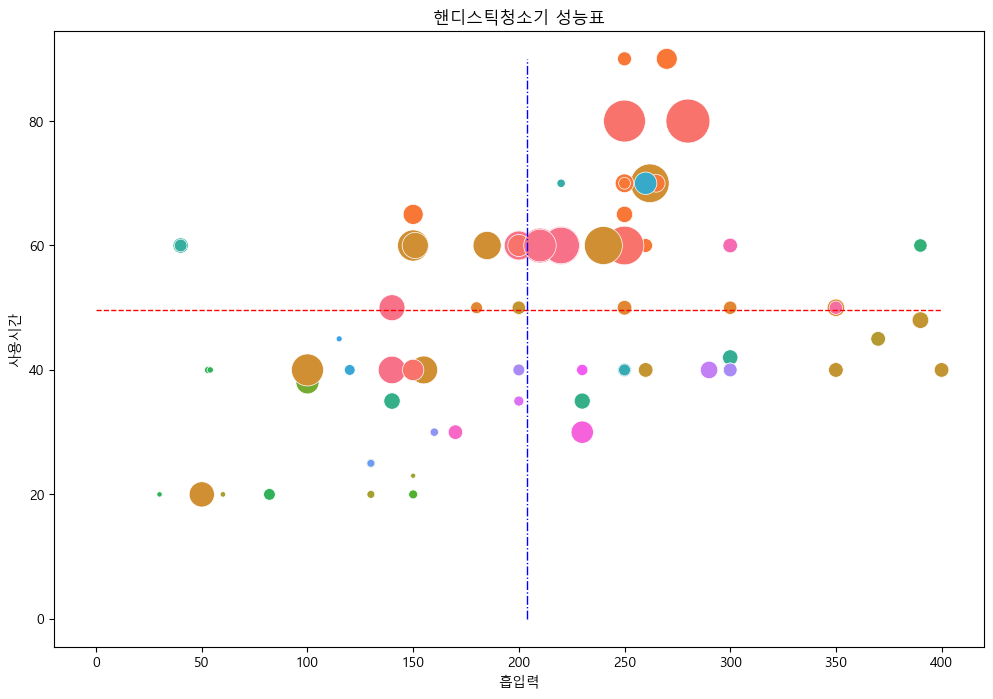

In [82]:
# 청소기 성능 시각화
plt.figure(figsize=(12,8))
plt.title("핸디스틱청소기 성능표")
sns.scatterplot(x="흡입력", y="사용시간", size="가격", hue=chart_data['회사명'], 
               data=chart_data, sizes=(10,1000), legend=False)
plt.plot([0, suction_max_value], [use_time_mean_value, use_time_mean_value],
        "r--", lw=1) #linewidth=1
plt.plot([suction_mean_value, suction_mean_value], [0, use_time_max_value],
        "b-.", lw=1)
plt.show()

# 8. 인기제품의 시각화

In [87]:
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
7,핸디스틱청소기,샤오미,드리미 V11,183710,90.0,250.0
16,핸디스틱청소기,아이닉,NEW i20,169000,50.0,300.0
21,핸디스틱청소기,아이닉,i30 아이타워,269000,50.0,350.0
29,핸디스틱청소기,샤오미,드리미 V10,156860,60.0,220.0
44,핸디스틱청소기,샤오미,드리미 T20,305970,70.0,250.0
76,핸디스틱청소기,샤오미,드리미 V12,375967,90.0,270.0
93,핸디스틱청소기,행커,400W,170100,60.0,390.0
102,핸디스틱청소기,DIBEA,올인원 UV,169000,50.0,250.0
105,핸디스틱청소기,샤오미,SHUNZAO Z11 MAX,179050,60.0,260.0
114,핸디스틱청소기,델로라,V11 파워 300W,81890,70.0,220.0


In [93]:
chart_data = pd_data_final.dropna(axis = 0)
len(chart_data)

147

In [94]:
# 흡입력, 사용시간의 최대값과 최소값 정리
suction_max_value = chart_data['흡입력'].max()
suction_min_value = chart_data['흡입력'].min()
use_time_max_value = chart_data['사용시간'].max()
use_time_min_value = chart_data['사용시간'].min()

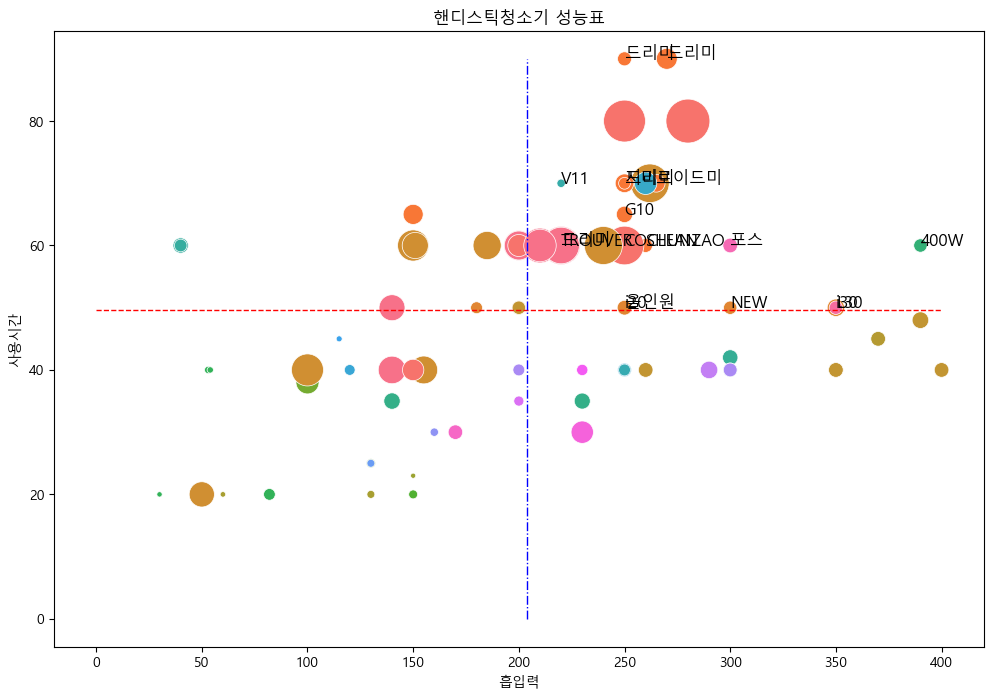

In [95]:
# 청소기 성능 시각화
plt.figure(figsize=(12,8))
plt.title("핸디스틱청소기 성능표")
sns.scatterplot(x="흡입력", y="사용시간", size="가격", hue=chart_data['회사명'], 
               data=chart_data, sizes=(10,1000), legend=False)
plt.plot([0, suction_max_value], [use_time_mean_value, use_time_mean_value],
        "r--", lw=1) #linewidth=1
plt.plot([suction_mean_value, suction_mean_value], [0, use_time_max_value],
        "b-.", lw=1)
for index, row in condition_data.iterrows(): # 데이터 프레임 행 반복하기
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x,y,s, size=12)
plt.show()

In [100]:
condition_data.iterrows

<bound method DataFrame.iterrows of         카테고리    회사명                제품      가격  사용시간    흡입력
7    핸디스틱청소기    샤오미           드리미 V11  183710  90.0  250.0
16   핸디스틱청소기    아이닉           NEW i20  169000  50.0  300.0
21   핸디스틱청소기    아이닉          i30 아이타워  269000  50.0  350.0
29   핸디스틱청소기    샤오미           드리미 V10  156860  60.0  220.0
44   핸디스틱청소기    샤오미           드리미 T20  305970  70.0  250.0
76   핸디스틱청소기    샤오미           드리미 V12  375967  90.0  270.0
93   핸디스틱청소기     행커              400W  170100  60.0  390.0
102  핸디스틱청소기  DIBEA            올인원 UV  169000  50.0  250.0
105  핸디스틱청소기    샤오미   SHUNZAO Z11 MAX  179050  60.0  260.0
114  핸디스틱청소기    델로라       V11 파워 300W   81890  70.0  220.0
124  핸디스틱청소기    샤오미       COCLEAN V30  129912  60.0  250.0
129  핸디스틱청소기    샤오미       로이드미 X30 프로  278060  70.0  265.0
132  핸디스틱청소기    샤오미               G10  241930  65.0  250.0
147  핸디스틱청소기    샤오미  TROUVER POWER 12  168370  60.0  220.0
178  핸디스틱청소기    샤오미        지미 JV85 프로  138220  70.0  250.0
206  핸디스틱청소기    아이닉 